# **Medical Insurance Cost Prediction**

## 1️⃣ **Introduction**

..........

## 2️⃣ **Data Cleaning**

Import all the needed libraries such as: pandas, matplotlib.pyplot, seaborn, statsmodels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np

Load the data by the following link:\
https://raw.githubusercontent.com/letuanGithubVn1/Medical-Insurance-Cost-Prediction/refs/heads/main/insurance.csv`

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/letuanGithubVn1/Medical-Insurance-Cost-Prediction/refs/heads/main/insurance.csv')

Let's take a look at the loaded data.

Output 5 random rows:

In [ ]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
751,21,male,28.975,0,no,northwest,1906.35825
330,61,female,36.385,1,yes,northeast,48517.56315
517,45,male,30.495,2,no,northwest,8413.46305
1005,29,male,31.730,2,no,northwest,4433.38770
225,55,male,33.880,3,no,southeast,11987.16820


Then it's reasonable to take a look at columns, dtypes and non-null values. Let's output this.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Fixing data types**

Understanding about One-hot-encoding:
https://machinelearningcoban.com/tabml_book/ch_data_processing/onehot.html

In [ ]:
# If columns paramatter is None then all the columns with object, string, or category dtype will be converted.
df_encoded = pd.get_dummies(df)
df_encoded.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   bool   
 5   sex_male          1338 non-null   bool   
 6   smoker_no         1338 non-null   bool   
 7   smoker_yes        1338 non-null   bool   
 8   region_northeast  1338 non-null   bool   
 9   region_northwest  1338 non-null   bool   
 10  region_southeast  1338 non-null   bool   
 11  region_southwest  1338 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 52.4 KB


In [ ]:
exclude_cols = ['bmi', 'charges', 'age', 'children']

# Hàm apply nhận mỗi cột làm tham số
df_encoded_converted = df_encoded.apply(lambda x: x.astype(int) if x.name not in exclude_cols else x)
# def parse_dtype(x, lst_bool_columns):
#   if x.name not in lst_bool_columns:
#     return x.astype(int)
#   else:
#     return x
# df_encoded1 = df_encoded.apply(lambda x: parse_dtype(x, exclude_cols))
df_encoded_converted.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
df_encoded_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   int64  
 5   sex_male          1338 non-null   int64  
 6   smoker_no         1338 non-null   int64  
 7   smoker_yes        1338 non-null   int64  
 8   region_northeast  1338 non-null   int64  
 9   region_northwest  1338 non-null   int64  
 10  region_southeast  1338 non-null   int64  
 11  region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.6 KB


### **📦 Handling Outliers**

Let's remove outliers

In [ ]:
df_encoded_converted.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
def remove_outlier(df, cols):
    for c in cols:
        Q1 = df[c].quantile(q=0.25)
        Q3 = df[c].quantile(q=0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[c] >= lower_bound) & (df[c] <= upper_bound)]
    return df

columns_to_remove = ['age', 'bmi', 'children', 'charges']
df_remove_outlier = remove_outlier(df_encoded_converted, columns_to_remove)

In [ ]:
df_remove_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1191 non-null   int64  
 1   bmi               1191 non-null   float64
 2   children          1191 non-null   int64  
 3   charges           1191 non-null   float64
 4   sex_female        1191 non-null   int64  
 5   sex_male          1191 non-null   int64  
 6   smoker_no         1191 non-null   int64  
 7   smoker_yes        1191 non-null   int64  
 8   region_northeast  1191 non-null   int64  
 9   region_northwest  1191 non-null   int64  
 10  region_southeast  1191 non-null   int64  
 11  region_southwest  1191 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 121.0 KB


## **3️⃣  Calculating Correlations**

**Objective:** Calculate and interpret correlations between variables in the dataset.

### **🧮 Calculations**

Finally, let's calculate correlations in the dataset and write insights and conclusion.


In [ ]:
matrix_columns = df_remove_outlier.corr()
matrix_columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.123827,0.038179,0.448798,0.021440,-0.021440,0.062095,-0.062095,0.001492,-0.002236,-0.016127,0.017103
bmi,0.123827,1.000000,0.007546,-0.064483,-0.016487,0.016487,0.260657,-0.260657,-0.132354,-0.112282,0.230793,0.013616
children,0.038179,0.007546,1.000000,0.089083,-0.015564,0.015564,0.001901,-0.001901,-0.023610,0.011655,-0.014751,0.026831
charges,0.448798,-0.064483,0.089083,1.000000,0.022893,-0.022893,-0.596213,0.596213,0.067055,0.037770,-0.029093,-0.076394
sex_female,0.021440,-0.016487,-0.015564,0.022893,1.000000,-1.000000,0.014027,-0.014027,-0.004247,-0.004669,0.003229,0.005751
sex_male,-0.021440,0.016487,0.015564,-0.022893,-1.000000,1.000000,-0.014027,0.014027,0.004247,0.004669,-0.003229,-0.005751
smoker_no,0.062095,0.260657,0.001901,-0.596213,0.014027,-0.014027,1.000000,-1.000000,-0.032499,-0.019187,0.002254,0.049917
smoker_yes,-0.062095,-0.260657,-0.001901,0.596213,-0.014027,0.014027,-1.000000,1.000000,0.032499,0.019187,-0.002254,-0.049917
region_northeast,0.001492,-0.132354,-0.023610,0.067055,-0.004247,0.004247,-0.032499,0.032499,1.000000,-0.336659,-0.333692,-0.325532
region_northwest,-0.002236,-0.112282,0.011655,0.037770,-0.004669,0.004669,-0.019187,0.019187,-0.336659,1.000000,-0.341210,-0.332866


Then plot it as a heatmap using Seaborn:

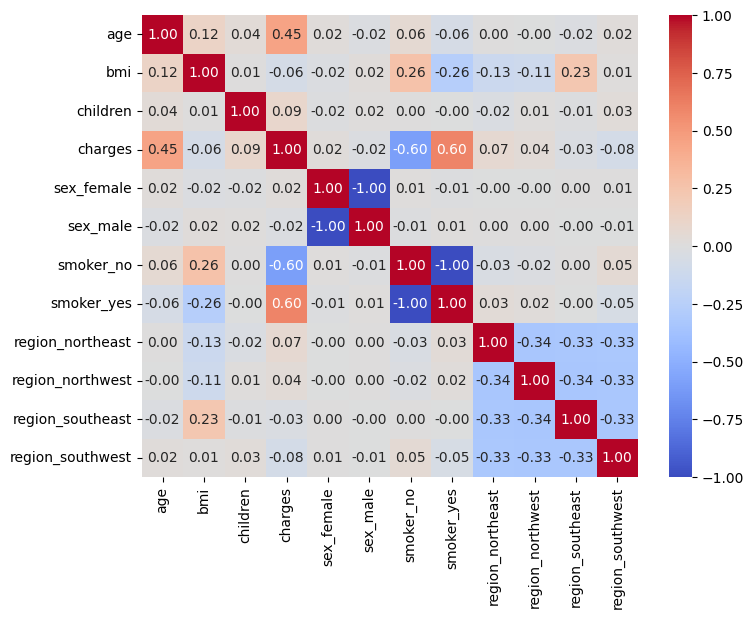

In [ ]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(matrix_columns, annot=True, cmap='coolwarm', fmt='.2f')

## **4️⃣ Regression**

### **Build a Regression Model**

**1. Standardization**

In [ ]:
scaler = StandardScaler()
cols = ['age', 'bmi', 'children']
df_scaled = pd.DataFrame(scaler.fit_transform(df_remove_outlier[cols]), columns=cols)
df_child = df_remove_outlier[['charges', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast']].reset_index(drop=True)

df_Standardization = pd.concat([df_scaled, df_child], axis=1)

In [ ]:
df_Standardization.head()

,age,bmi,children,charges,smoker_yes,region_northeast,region_northwest,region_southeast
0,-1.424190,-0.356784,-0.894220,16884.92400,1,0,0,0
1,-1.495361,0.643537,-0.071814,1725.55230,0,0,0,1
2,-0.783654,0.512320,1.572998,4449.46200,0,0,0,1
3,-0.427801,-1.242076,-0.894220,21984.47061,0,0,1,0
4,-0.498972,-0.189779,-0.894220,3866.85520,0,0,1,0


In [ ]:
y_train = df_Standardization['charges']
x_train = df_Standardization[['age', 'bmi', 'children', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast']]

**2. Add a contant to $x$**

In [ ]:
x = sm.add_constant(x_train)

**3. Fit simple linear regression model**

In [ ]:
model = sm.OLS(y_train, x).fit()

**4. Print the summary**

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     258.9
Date:                Fri, 30 May 2025   Prob (F-statistic):          1.71e-233
Time:                        06:17:22   Log-Likelihood:                -11712.
No. Observations:                1191   AIC:                         2.344e+04
Df Residuals:                    1183   BIC:                         2.348e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7555.6513    268.834  

### **Adjust the Model**

Let's Remove the variables that aren’t statistically significant (P > 0.05) and rebuild the model.

In [ ]:
# x_train_adjusted = df_Standardization[['age', 'bmi', 'children', 'smoker_yes', 'region_northeast', 'region_northwest']]
significant_cols = x.columns[model.pvalues < 0.05] # ---> Trả về danh sách cột có p-value < 0.05
df_Standardization_adjusted = x[significant_cols]
df_Standardization_adjusted.head()

,const,age,bmi,children,smoker_yes,region_northeast,region_northwest
0,1.0,-1.424190,-0.356784,-0.894220,1,0,0
1,1.0,-1.495361,0.643537,-0.071814,0,0,0
2,1.0,-0.783654,0.512320,1.572998,0,0,0
3,1.0,-0.427801,-1.242076,-0.894220,0,0,1
4,1.0,-0.498972,-0.189779,-0.894220,0,0,1


In [ ]:
model_adjusted = sm.OLS(y_train, df_Standardization_adjusted).fit()
print(model_adjusted.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     302.0
Date:                Fri, 30 May 2025   Prob (F-statistic):          1.33e-234
Time:                        06:26:33   Log-Likelihood:                -11713.
No. Observations:                1191   AIC:                         2.344e+04
Df Residuals:                    1184   BIC:                         2.348e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7708.0636    195.147  

## 5️⃣ **Forecasting**

In [ ]:
test_data = pd.DataFrame({
    'age': [25, 31],
    'bmi': [22.5, 21.5],
    'children': [0, 1],
    'smoker_yes': [0, 0],
    'region_northwest': [0, 0],
    'region_southeast': [1, 1],
})

test_data = sm.add_constant(test_data, has_constant='add')

predictions = model_adjusted.predict(test_data)

print(predictions)

0    103994.182376
1    124721.251502
dtype: float64


**Conclusions:** The second person has higher costs than the first person, with the characteristics of having one child and being older (31 compared to 25), even though their BMI is lower (21.5 compared to 22).

1. What is the difference in insurance costs between older and younger individuals?

In [ ]:
test_data = pd.DataFrame({
    'age': [25, 31],
    'bmi': [22.5, 22.5],
    'children': [0, 0],
    'smoker_yes': [0, 0],
    'region_northwest': [0, 0],
    'region_southeast': [1, 1],
})

test_data = sm.add_constant(test_data, has_constant='add')

predictions = model_adjusted.predict(test_data)

print(predictions)

0    103994.182376
1    124617.440648
dtype: float64


**Conclusions:** The results indicate that individuals of higher age are associated with increased insurance costs.

2. How do insurance cost differ between smoker and non-smoker?

In [ ]:
test_data = pd.DataFrame({
    'age': [25, 25],
    'bmi': [22.5, 22.5],
    'children': [0, 0],
    'smoker_yes': [1, 0],
    'region_northwest': [0, 0],
    'region_southeast': [1, 1],
})

test_data = sm.add_constant(test_data, has_constant='add')

predictions = model_adjusted.predict(test_data)

print(predictions)

0    118399.910267
1    103994.182376
dtype: float64


**Conclusions:** Smokers have higher insurance costs than non-smokers.